In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px

In [4]:
asia_cup=pd.read_csv(r'C:\2 NIT\data\Asia Cup\all_asia_cup_matches.csv')
batsmen= pd.read_csv(r'C:\2 NIT\data\Asia Cup\all_batsmen_data.csv')
win_ratio= pd.read_csv(r'C:\2 NIT\data\Asia Cup\one_vs_one_win_ratio.csv')

In [5]:
asia_cup.head()

,Team 1,Team 2,Year,Venue,Format,Won,1st Innings,2nd Innings
0,Pakistan,Sri Lanka,1984,Sharjah,ODI,Sri Lanka,N,Y
1,Sri Lanka,India,1984,Sharjah,ODI,India,N,Y
2,India,Pakistan,1984,Sharjah,ODI,India,Y,N
3,Pakistan,Sri Lanka,1986,Colombo,ODI,Pakistan,Y,N
4,Bangladesh,Pakistan,1986,Moratuwa,ODI,Pakistan,N,Y


In [6]:
asia_cup.shape

(104, 8)

In [7]:
asia_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Team 1       104 non-null    object
 1   Team 2       104 non-null    object
 2   Year         104 non-null    int64 
 3   Venue        104 non-null    object
 4   Format       104 non-null    object
 5   Won          104 non-null    object
 6   1st Innings  104 non-null    object
 7   2nd Innings  104 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.6+ KB


In [8]:
asia_cup.describe()

,Year
count,104.000000
mean,2003.951923
std,10.191735
min,1984.000000
25%,1997.000000
50%,2004.000000
75%,2012.000000
max,2018.000000


In [9]:
asia_cup['Won'].unique()

array(['Sri Lanka', 'India', 'Pakistan', 'No Result', 'Bangladesh',
       'Afghanistan', 'Tied'], dtype=object)

In [10]:
asia_cup['Won'].value_counts()

Sri Lanka      34
India          31
Pakistan       26
Bangladesh      7
Afghanistan     3
No Result       2
Tied            1
Name: Won, dtype: int64

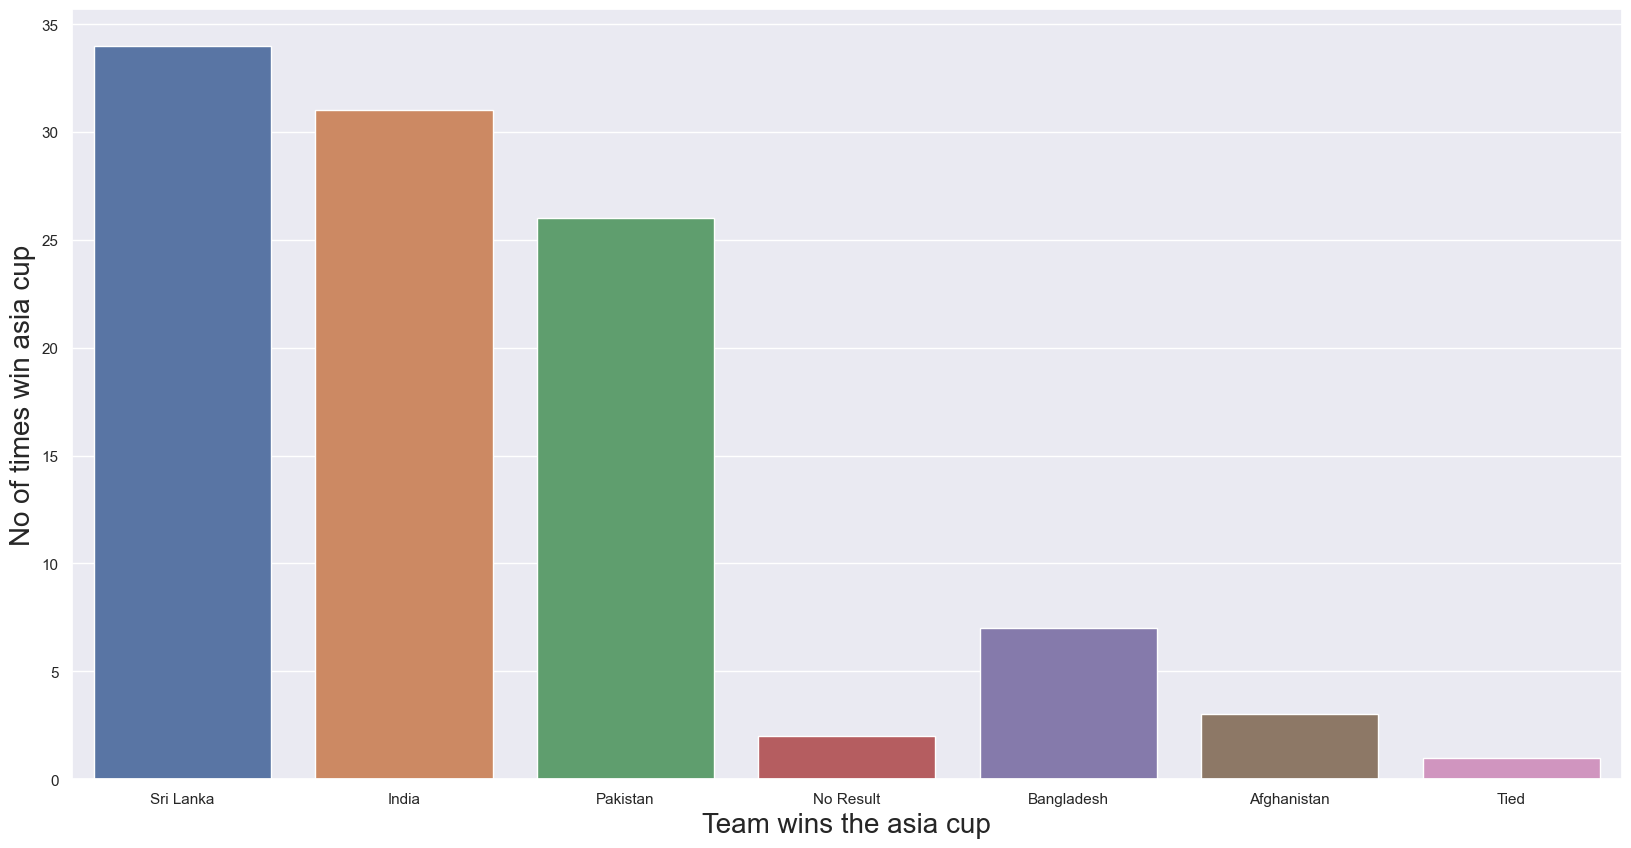

In [15]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.countplot(x='Won',data=asia_cup)
plt.xlabel('Team wins the asia cup',size=20)
plt.ylabel('No of times win asia cup',size=20)
plt.show()

In [17]:
asia_cup['Venue'].value_counts()

Colombo       20
Mirpur        13
Dhaka         12
Sharjah       10
Dambulla      10
Karachi       10
Dubai          8
Fatullah       5
Abu Dhabi      5
Lahore         3
Chattogram     2
Kolkota        2
Moratuwa       1
Kandy          1
Chandigarh     1
Cuttack        1
Name: Venue, dtype: int64

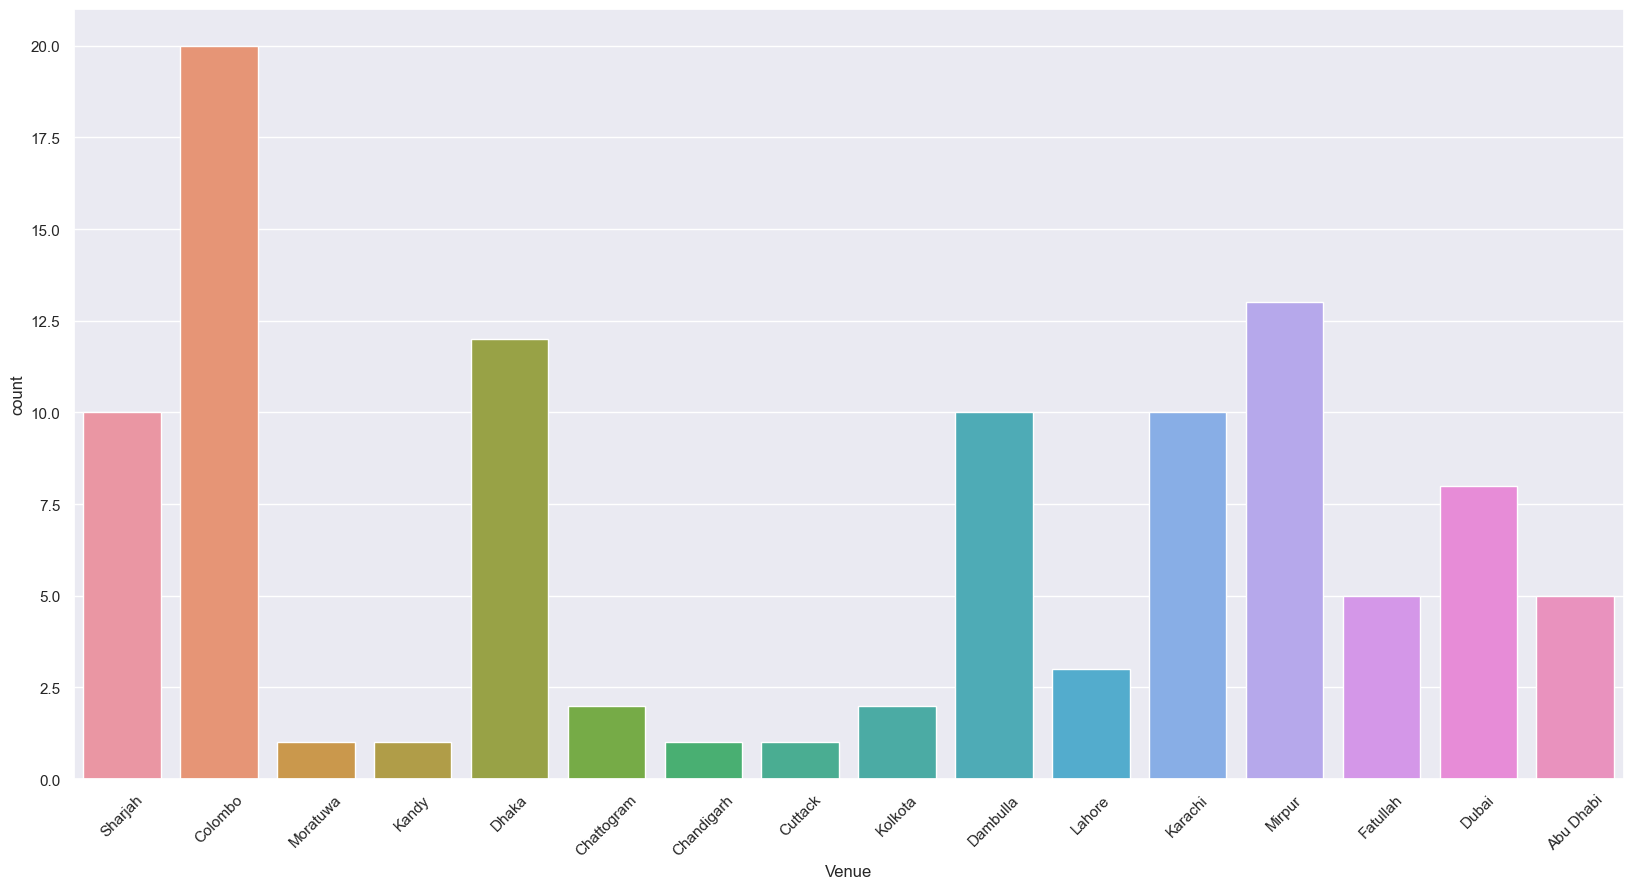

In [20]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.countplot(x='Venue',data=asia_cup)
plt.xticks(rotation=45)
plt.show()

In [21]:
asia_cup[asia_cup['Won']=='Bangladesh']

,Team 1,Team 2,Year,Venue,Format,Won,1st Innings,2nd Innings
40,Bangladesh,Hong Kong,2004,Colombo,ODI,Bangladesh,Y,N
53,Bangladesh,United Arab Emirates,2008,Lahore,ODI,Bangladesh,Y,N
76,India,Bangladesh,2012,Mirpur,ODI,Bangladesh,N,Y
78,Sri Lanka,Bangladesh,2012,Mirpur,ODI,Bangladesh,N,Y
91,Bangladesh,Sri Lanka,2018,Dubai,ODI,Bangladesh,Y,N
100,Bangladesh,Afghanistan,2018,Abu Dhabi,ODI,Bangladesh,Y,N
102,Bangladesh,Pakistan,2018,Abu Dhabi,ODI,Bangladesh,Y,N


In [22]:
asia_cup_subset=asia_cup[['Team 1','Team 2','Won']]
asia_cup_subset.head()

,Team 1,Team 2,Won
0,Pakistan,Sri Lanka,Sri Lanka
1,Sri Lanka,India,India
2,India,Pakistan,India
3,Pakistan,Sri Lanka,Pakistan
4,Bangladesh,Pakistan,Pakistan


In [27]:
team1 = asia_cup_subset['Team 1'].isin(['Pakistan','India'])
team2 = asia_cup_subset['Team 2'].isin(['Pakistan','India'])
pak_ind = asia_cup_subset[team1 & team2 ]
pak_ind

,Team 1,Team 2,Won
2,India,Pakistan,India
11,Pakistan,India,India
20,Pakistan,India,Pakistan
28,Pakistan,India,No Result
29,India,Pakistan,No Result
37,Pakistan,India,Pakistan
49,Pakistan,India,Pakistan
58,Pakistan,India,India
62,India,Pakistan,Pakistan
69,Pakistan,India,India


In [28]:
asia_cup.isnull().sum()

Team 1         0
Team 2         0
Year           0
Venue          0
Format         0
Won            0
1st Innings    0
2nd Innings    0
dtype: int64

In [32]:

no_of_times_played = len(pak_ind)
print(f'There are total {no_of_times_played} matches in asia cup played between India and Pakistan. \n')

no_result = len(pak_ind[pak_ind['Won'] == 'No Result'])
print(f'{no_result} times No Results were declared out of {no_of_times_played} matches. \n')


india_win = len(pak_ind[pak_ind['Won'] == 'India'])

india_loss = no_of_times_played - india_win - no_result
print(f'India wins {india_win} times and loss match {india_loss} times out of {no_of_times_played} matches. \n')


pak_win = len(pak_ind[pak_ind['Won'] == 'Pakistan'])

pak_loss = no_of_times_played - pak_win - no_result
print(f'Pakistan wins {pak_win} times and loss match {pak_loss} times out of {no_of_times_played} matches. \n')


win = round(((india_win + pak_win) / (no_of_times_played) * 100), 2)
print(f'The win rate between India and Pakistan is {win} %. \n')


loss = round(100 - win, 2)
print(f'The loss rate between India and Pakistan is {loss} %. \n')


print('Win/loss ratio between India and Pakistan is ', round(win/loss, 2))


There are total 14 matches in asia cup played between India and Pakistan. 

2 times No Results were declared out of 14 matches. 

India wins 7 times and loss match 5 times out of 14 matches. 

Pakistan wins 5 times and loss match 7 times out of 14 matches. 

The win rate between India and Pakistan is 85.71 %. 

The loss rate between India and Pakistan is 14.29 %. 

Win/loss ratio between India and Pakistan is  6.0


In [33]:
asia_cup['1st Innings'].value_counts()

N    55
Y    49
Name: 1st Innings, dtype: int64

In [34]:
asia_cup['2nd Innings'].value_counts()

Y    52
N    52
Name: 2nd Innings, dtype: int64

In [36]:
px.bar(asia_cup,y=['1st Innings','2nd Innings'],barmode='group',title='Chasing a target or setting a target',labels = {'value':'Setting a target of chasing a target'},height=800)

In [37]:
batsmen.head()

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate
0,India,Rohit Sharma,vs Pakistan,8,70,30,14.00,127.27
1,India,Rohit Sharma,vs Afghanistan,2,75,74,75.00,156.25
2,India,Rohit Sharma,vs Sri Lanka,18,339,118,21.18,138.93
3,India,Rohit Sharma,vs Bangladesh,11,452,89,41.09,144.40
4,India,Rohit Sharma,year 2022,13,290,64,24.16,140.09


In [38]:
batsmen.shape

(200, 8)

In [39]:
batsmen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         200 non-null    object 
 1   Player       200 non-null    object 
 2   Filter       200 non-null    object 
 3   Matches      200 non-null    int64  
 4   Runs         200 non-null    int64  
 5   Highest      200 non-null    int64  
 6   Average      184 non-null    float64
 7   Strike Rate  200 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 12.6+ KB


In [40]:
batsmen.isnull().sum()

Team            0
Player          0
Filter          0
Matches         0
Runs            0
Highest         0
Average        16
Strike Rate     0
dtype: int64

In [41]:
batsmen.describe()

,Matches,Runs,Highest,Average,Strike Rate
count,200.000000,200.000000,200.000000,184.000000,200.000000
mean,4.615000,83.075000,36.130000,23.994837,120.013300
std,3.556687,89.368692,25.121076,17.875742,48.964631
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.750000,16.750000,11.937500,97.722500
50%,4.000000,50.000000,31.000000,21.090000,119.430000
75%,7.000000,112.000000,52.250000,31.615000,136.645000
max,18.000000,452.000000,118.000000,92.000000,400.000000


In [43]:
batsmen['cumulative_batting_average'] = batsmen['Average'].expanding().mean()

In [44]:
batsmen['cumulative_batting_average'].max()

46.120769230769234

In [45]:
batsmen[batsmen['cumulative_batting_average']==46.120769230769234]

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average
12,India,Virat Kohli,vs Bangladesh,4,129,57,64.5,113.15,46.120769


In [50]:
batsmen['cumulative_strike_rate_average'] = batsmen['Strike Rate'].expanding().mean()

In [51]:
batsmen['cumulative_strike_rate_average'].max()

147.9231914893617

In [52]:
batsmen[batsmen['cumulative_strike_rate_average']==147.9231914893617]

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average,cumulative_strike_rate_average
46,Pakistan,Asif Ali,vs Afghanistan,1,25,25,NaN,357.14,35.272051,147.923191


In [55]:
batsmen_subset = batsmen.sort_values(by=['Runs'],ascending=False)
top_10 = batsmen_subset.iloc[:10]
top_10

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average,cumulative_strike_rate_average
3,India,Rohit Sharma,vs Bangladesh,11,452,89,41.09,144.40,37.817500,141.712500
16,India,Suryakumar Yadav,year 2022,12,428,117,38.90,189.38,42.336471,132.976471
2,India,Rohit Sharma,vs Sri Lanka,18,339,118,21.18,138.93,36.726667,140.816667
11,India,Virat Kohli,vs Sri Lanka,7,339,82,84.75,140.60,44.589167,128.745833
161,Sri Lanka,Pathum Nissanka,year 2022,11,326,75,29.63,114.38,24.969660,122.504444
9,India,Virat Kohli,vs Pakistan,7,311,78,77.75,118.25,40.032000,127.615000
154,Sri Lanka,Dasun Shanaka,year 2022,11,308,74,44.00,145.28,25.110143,122.662452
114,Bangladesh,Mushfiqur Rahim,vs Sri Lanka,10,296,72,42.28,149.49,27.066337,129.244348
7,India,KL Rahul,vs Sri Lanka,8,295,89,42.14,141.14,36.196250,128.666250
101,Bangladesh,Shakib Al Hasan,vs Pakistan,9,292,84,41.71,127.51,26.928315,130.304118


In [57]:
px.bar(top_10,x='Player',y='Runs',color='Team',title='Top 10 players by overall performance',text_auto=True)

In [58]:
batsmen_recent = batsmen [batsmen['Filter']=='year 2022']
batsmen_recent_sort = batsmen_recent.sort_values(by = ['Runs'], ascending = False)
top_10_recent = batsmen_recent_sort.iloc[:10]
top_10_recent

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average,cumulative_strike_rate_average
16,India,Suryakumar Yadav,year 2022,12,428,117,38.90,189.38,42.336471,132.976471
161,Sri Lanka,Pathum Nissanka,year 2022,11,326,75,29.63,114.38,24.969660,122.504444
154,Sri Lanka,Dasun Shanaka,year 2022,11,308,74,44.00,145.28,25.110143,122.662452
4,India,Rohit Sharma,year 2022,13,290,64,24.16,140.09,35.086000,141.388000
31,India,Hardik Pandya,year 2022,13,281,51,31.22,139.80,36.887241,144.128750
23,India,Deepak Hooda,year 2022,9,274,104,54.80,161.17,39.036957,134.131250
21,India,Rishabh Pant,year 2022,13,260,52,26.00,135.51,39.145238,133.033182
73,Afghanistan,Najibullah Zadran,year 2022,10,255,57,31.87,144.06,30.642097,137.296892
186,Hong Kong,Nizakat Khan,year 2022,8,249,81,31.12,114.74,24.737076,121.504332
167,Sri Lanka,Charith Asalanka,year 2022,11,226,53,22.60,113.00,25.242237,123.014762


In [59]:
px.bar(top_10_recent,x='Player',y='Runs',color='Team',title='Top 10 players by recent performance',text_auto=True)